In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metric

In [2]:
train1=pd.read_csv(r"C:\Users\karth\Desktop\HACKEREARTH\dataset\train.csv")
test1=pd.read_csv(r"C:\Users\karth\Desktop\HACKEREARTH\dataset\test.csv")

In [3]:
target='Cost'

In [4]:
train1.drop(['Customer Id','Artist Name'],axis=1,inplace=True)
test1.drop('Artist Name',axis=1,inplace=True)

In [5]:
numerical_features=train1.select_dtypes(include=[np.number])
categorical_features=train1.select_dtypes(include=[np.object])

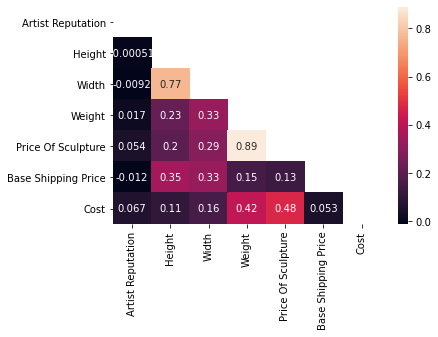

In [6]:
# correlation heatmap for all features
corr = train1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

In [7]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)
    
def Datashape(data):
    rows,cols=data.shape
    print('The dataframe has',rows,'Rows and',cols,'Columns.')
    
def getRmse(y_train, y_train_pred):
    print(metric.mean_squared_error(y_train, y_train_pred))
    
def log1p(vec):
    return np.log1p(abs(vec))

def expm1(x):
    return np.expm1(x)

def clipExp(vec):
    return np.clip(expm1(vec), 0, None)

def getRmse(y_train, y_train_pred):
    print(metric.mean_squared_error(y_train, y_train_pred))

In [8]:
fillNan(train1,'Artist Reputation',train1['Artist Reputation'].median())
fillNan(test1,'Artist Reputation',test1['Artist Reputation'].median())
train1['Artist Reputation'].isna().any()
fillNan(train1,'Height',train1['Height'].median())
fillNan(test1,'Height',test1['Height'].median())
train1['Height'].isna().any()
fillNan(train1,'Width',train1['Width'].median())
fillNan(test1,'Width',test1['Width'].median())
train1['Width'].isna().any()
fillNan(train1,'Weight',train1['Weight'].median())
fillNan(test1,'Weight',test1['Weight'].median())
train1['Weight'].isna().any()
fillNan(train1,'Material',train1['Material'].mode()[0])
fillNan(test1,'Material',test1['Material'].mode()[0])
train1['Material'].isna().any()
fillNan(train1,'Transport',train1['Transport'].mode()[0])
fillNan(test1,'Transport',test1['Transport'].mode()[0])
train1['Transport'].isna().any()
fillNan(train1,'Remote Location',train1['Remote Location'].mode()[0])
fillNan(test1,'Remote Location',test1['Remote Location'].mode()[0])
train1['Remote Location'].isna().any()

False

In [9]:
test1.isnull().sum()

Customer Id              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
dtype: int64

In [10]:
train1['State location']=train1['Customer Location'].map(lambda x:x.split()[-2])
train1.drop('Customer Location',axis=1,inplace=True)

In [11]:
test1['State location']=test1['Customer Location'].map(lambda x:x.split()[-2])
test1.drop('Customer Location',axis=1,inplace=True)

In [12]:
from datetime import date
train1['Scheduled Date']= pd.to_datetime(train1['Scheduled Date'])
train1['Delivery Date']= pd.to_datetime(train1['Delivery Date'])

In [13]:
test1['Scheduled Date']= pd.to_datetime(test1['Scheduled Date'])
test1['Delivery Date']= pd.to_datetime(test1['Delivery Date'])

In [14]:
train1['Diff']=(train1['Delivery Date']-train1['Scheduled Date']).map(lambda x:str(x).split()[0])
train1['Diff']=pd.to_numeric(train1['Diff'])
test1['Diff']=(test1['Delivery Date']-test1['Scheduled Date']).map(lambda x:str(x).split()[0])
test1['Diff']=pd.to_numeric(test1['Diff'])

In [15]:
train1['dday'] = train1['Delivery Date'].dt.day
train1['dmonth'] = train1['Delivery Date'].dt.month
train1['dyear'] = train1['Delivery Date'].dt.year
train1['ddayofweek'] = train1['Delivery Date'].dt.dayofweek


In [16]:
test1['dday'] = test1['Delivery Date'].dt.day
test1['dmonth'] = test1['Delivery Date'].dt.month
test1['dyear'] = test1['Delivery Date'].dt.year
test1['ddayofweek'] = test1['Delivery Date'].dt.dayofweek

In [17]:
test1.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,...,Customer Information,Remote Location,Scheduled Date,Delivery Date,State location,Diff,dday,dmonth,dyear,ddayofweek
0,fffe3400310033003300,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,...,Working Class,No,2017-07-03,2017-07-06,IA,3,6,7,2017,3
1,fffe3600350035003400,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,...,Working Class,No,2016-05-02,2016-05-02,OH,0,2,5,2016,0
2,fffe3700360030003500,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,...,Working Class,No,2018-01-04,2018-01-06,AP,2,6,1,2018,5
3,fffe350038003600,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,...,Wealthy,No,2017-09-14,2017-09-17,AL,3,17,9,2017,6
4,fffe3500390032003500,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,...,Working Class,Yes,2017-12-03,2017-12-02,LA,-1,2,12,2017,5


In [18]:
train1.drop(['Scheduled Date','Delivery Date'],inplace=True,axis=1)
test1.drop(['Scheduled Date','Delivery Date'],inplace=True,axis=1)

In [19]:
numerical_features=train1.select_dtypes(include=[np.number])
categorical_features=train1.select_dtypes(include=[np.object])

In [20]:
numerical_features.head()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost,Diff,dday,dmonth,dyear,ddayofweek
0,0.26,17.0,6.0,4128.0,13.91,16.27,-283.29,-4,3,6,2015,2
1,0.28,3.0,3.0,61.0,6.83,15.00,-159.96,-1,5,3,2017,6
2,0.07,8.0,5.0,237.0,4.96,21.18,-154.29,-1,8,3,2015,6
3,0.12,9.0,8.0,3102.0,5.81,16.31,-161.16,-4,20,5,2015,2
4,0.15,17.0,6.0,324.0,3.18,11.94,-159.23,-4,14,12,2016,2


In [21]:
categorical_features.head()

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State location
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,OH
1,Brass,No,No,No,Roadways,No,Working Class,No,WY
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,WA
3,Aluminium,No,No,No,Roadways,No,Wealthy,Yes,KY
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,PA


In [22]:
def Encoding(data, f, data_test=None):
    feat = data[f].unique()
    feat_idx = [x for x in range(len(feat))]

    data[f].replace(feat, feat_idx, inplace=True)
    if data_test is not None:
        data_test[f].replace(feat, feat_idx, inplace=True)

In [23]:
for col in categorical_features.columns:
    Encoding(train1, col, test1)

In [24]:
val=['Transport']
for feat in categorical_features.columns:
    if len(train1[feat].unique()) > 2 and feat in val:
        dummy = pd.get_dummies(train1[feat], drop_first=True, prefix=feat+"_")
        train1 = pd.concat([train1, dummy], axis=1)
        train1.drop(feat, axis=1, inplace=True)

In [25]:
# create dummy features
custom_feat = ['Transport']
for feat in categorical_features.columns:
    if len(test1[feat].unique()) > 2 and feat in custom_feat:
        dummyVars = pd.get_dummies(test1[feat], drop_first=True, prefix=feat+"_")
        test1 = pd.concat([test1, dummyVars], axis=1)
        test1.drop(feat, axis=1, inplace=True)

test1.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,...,Customer Information,Remote Location,State location,Diff,dday,dmonth,dyear,ddayofweek,Transport__1,Transport__2
0,fffe3400310033003300,0.35,53.0,18.0,871.0,3,5.98,19.11,0,0,...,0,0,20,3,6,7,2017,3,0,0
1,fffe3600350035003400,0.67,7.0,4.0,108.0,1,6.92,13.96,1,1,...,0,0,0,0,2,5,2016,0,1,0
2,fffe3700360030003500,0.61,6.0,5.0,97.0,2,4.23,13.62,0,1,...,0,0,18,2,6,1,2018,5,0,0
3,fffe350038003600,0.14,15.0,8.0,757.0,1,6.28,23.79,1,0,...,1,0,5,3,17,9,2017,6,1,0
4,fffe3500390032003500,0.63,10.0,4.0,1673.0,4,4.39,17.83,1,0,...,0,1,28,-1,2,12,2017,5,1,0


In [26]:
Datashape(train1)

The dataframe has 6500 Rows and 22 Columns.


In [27]:
Datashape(test1)

The dataframe has 3500 Rows and 22 Columns.


In [28]:
train1[target]=np.log1p(abs(train1[target]))

In [29]:
train1[target].min()

4.466712392840524

In [30]:
seed=12
np.random.seed(seed)

In [31]:
train_shuffle = train1.sample(frac=1, random_state=seed).reset_index(drop=True)

In [32]:
y=train_shuffle.pop(target)

In [33]:
x=train_shuffle

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=seed)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)

In [37]:
X_test = pd.DataFrame(scale.transform(X_test), columns=X_train.columns)

In [38]:
X_train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,...,Customer Information,Remote Location,State location,Diff,dday,dmonth,dyear,ddayofweek,Transport__1,Transport__2
0,0.45,0.200000,0.139535,1.356762e-06,0.500000,0.000005,0.051345,1.0,1.0,0.0,...,0.0,0.0,0.169811,0.375,0.033333,0.363636,0.25,0.000000,1.0,0.0
1,0.07,0.100000,0.139535,1.062090e-04,1.000000,0.000042,0.247833,0.0,1.0,0.0,...,0.0,0.0,0.207547,0.500,0.200000,0.181818,0.50,0.166667,0.0,0.0
2,0.91,0.157143,0.093023,2.961980e-05,0.000000,0.000046,0.131474,1.0,1.0,1.0,...,0.0,0.0,0.754717,0.125,0.300000,0.000000,0.75,0.333333,1.0,0.0
3,0.19,0.057143,0.046512,8.649355e-07,0.166667,0.000004,0.124250,1.0,0.0,0.0,...,1.0,1.0,0.037736,1.000,0.100000,0.727273,0.50,0.000000,1.0,0.0
4,0.97,0.485714,0.116279,2.366701e-05,0.166667,0.000015,0.127028,0.0,1.0,0.0,...,0.0,0.0,0.471698,0.375,0.366667,0.272727,1.00,0.666667,1.0,0.0


In [52]:
import sklearn.ensemble as ske

In [53]:
gb_model = ske.GradientBoostingRegressor()

gb_model.fit(X_train, Y_train)

# predict
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)
getRmse(Y_train, y_train_pred)
getRmse(Y_test, y_test_pred)

0.09298270003064503
0.12085141900262587


In [54]:
gb_model.score(X_test,Y_test)

0.9550081368218366

In [55]:
gb_model.score(X_train,Y_train)

0.9660027413349755

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'subsample':[.5,.75,1],
               'learning_rate':[.001,0.01,.1],
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [59]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'subsample': [0.5, 0.75, 1], 'learning_rate': [0.001, 0.01, 0.1], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [60]:
rf_randomcv=RandomizedSearchCV(estimator=gb_model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [61]:
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.5min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'subsample': [0.5, 0.75, 1]},
             

In [63]:
best_random_grid=rf_randomcv.best_estimator_

In [65]:
y_train_pred = best_random_grid.predict(X_train)
y_test_pred = best_random_grid.predict(X_test)
getRmse(Y_train, y_train_pred)
getRmse(Y_test, y_test_pred)

0.006491331762040234
0.07685563977743856


In [68]:
best_random_grid.score(X_train,Y_train)

0.9976265747830313

In [70]:
best_random_grid.score(X_test,Y_test)

0.9713873576506239

In [77]:
def getTestResults(model=None, roundOff=False):
    df_final = train1.sample(frac=1, random_state=1).reset_index(drop=True)
    test_cols = [x for x in df_final.columns if target not in x]
    df_final_test = test1[test_cols]
    df_y = df_final.pop(target)
    df_X = df_final

#     scaler = skp.RobustScaler()
    scaler = MinMaxScaler()
#     scaler = skp.StandardScaler()

    df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)
    X_test = pd.DataFrame(scaler.transform(df_final_test), columns=df_X.columns)
    
    # for machine learning models, else neural network will work
    
    rf_randomcv.fit(df_X, df_y)
    
    best_random_grid=rf_randomcv.best_estimator_

    # predict
    y_train_pred = best_random_grid.predict(df_X)
    y_test_pred = best_random_grid.predict(X_test)
    
    if roundOff:
        y_train_pred = np.round(y_train_pred)
        y_test_pred = np.round(y_test_pred)
                
    if type(y_test_pred[0]) == np.ndarray:
        y_test_pred = np.ravel(y_test_pred)

    getRmse(df_y, y_train_pred)
    return clipExp(y_test_pred)

In [78]:
# ML models
results = getTestResults(roundOff=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 28.3min finished


0.005501357158215883


In [79]:
submission = pd.DataFrame({
    'Customer Id': test1['Customer Id'],
    target: results,
})
submission.head()

,Customer Id,Cost
0,fffe3400310033003300,234.895579
1,fffe3600350035003400,269.885961
2,fffe3700360030003500,196.838542
3,fffe350038003600,193.174091
4,fffe3500390032003500,319.286279


In [80]:
submission.to_csv('./submission_Ensemble1.csv', index=False)